## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2018-19 учебный год

### Домашнее задание №4. Градиентный бустинг ~~своими руками~~

Задание выполнил(а): Подчезерцев Алексей

### Общая информация
__Дата выдачи:__ 27.04.2019

__Дедлайн:__ 23:59 12.05.2019

### Оценивание и штрафы

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи
__Стирать условия нельзя!__

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Формат названия файла: homework_04_Подчезерцев_Алексей.ipynb

__Задание 1. (0.5 балла)__

Мы будем использовать данные соревнования [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk/data). 
* Загрузите таблицу application_train.csv;
* Запишите в Y столбец с целевой переменной;
* Удалите ненужные столбцы (для этого воспользуйтесь описанием);
* Определите тип столбцов и заполните пропуски - стратегия произвольная;
* Разбейте выборку в соотношении 70:30 с random_state=0.

Так как в данных значительный дисбаланс классов, в качестве метрики качества везде будем использовать площадь под precision-recall кривой.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
%%time
X_orig = pd.read_csv('application_train.csv', index_col=0)

Wall time: 16.7 s


In [3]:
%%time
X = X_orig.copy()

Wall time: 171 ms


Приведем в числовой вид бинарные признаки

In [4]:
%%time
X["CODE_GENDER"] = X.apply(lambda x: 1 if x["CODE_GENDER"] == 'M' else 0, axis=1)
X["FLAG_OWN_CAR"] = X.apply(lambda x: 1 if x["FLAG_OWN_CAR"] == 'Y' else 0, axis=1)
X["FLAG_OWN_REALTY"] = X.apply(lambda x: 1 if x["FLAG_OWN_REALTY"] == 'Y' else 0, axis=1)
X["NAME_CONTRACT_TYPE"] = X.apply(lambda x: 1 if x["NAME_CONTRACT_TYPE"] == 'Revolving loans' else 0, axis=1)
#X = X.drop("NAME_TYPE_SUITE", axis=1)

Wall time: 23.2 s


In [9]:
def plot_corr(D, size):
    corr = D.corr()
    corr = np.abs(corr)
    f, ax = plt.subplots(figsize=(size, size))
    cmap = plt.cm.Oranges
    sns.heatmap(corr, cmap=cmap,
            xticklabels=corr.columns,
            yticklabels=corr.columns)

Wall time: 20.2 s


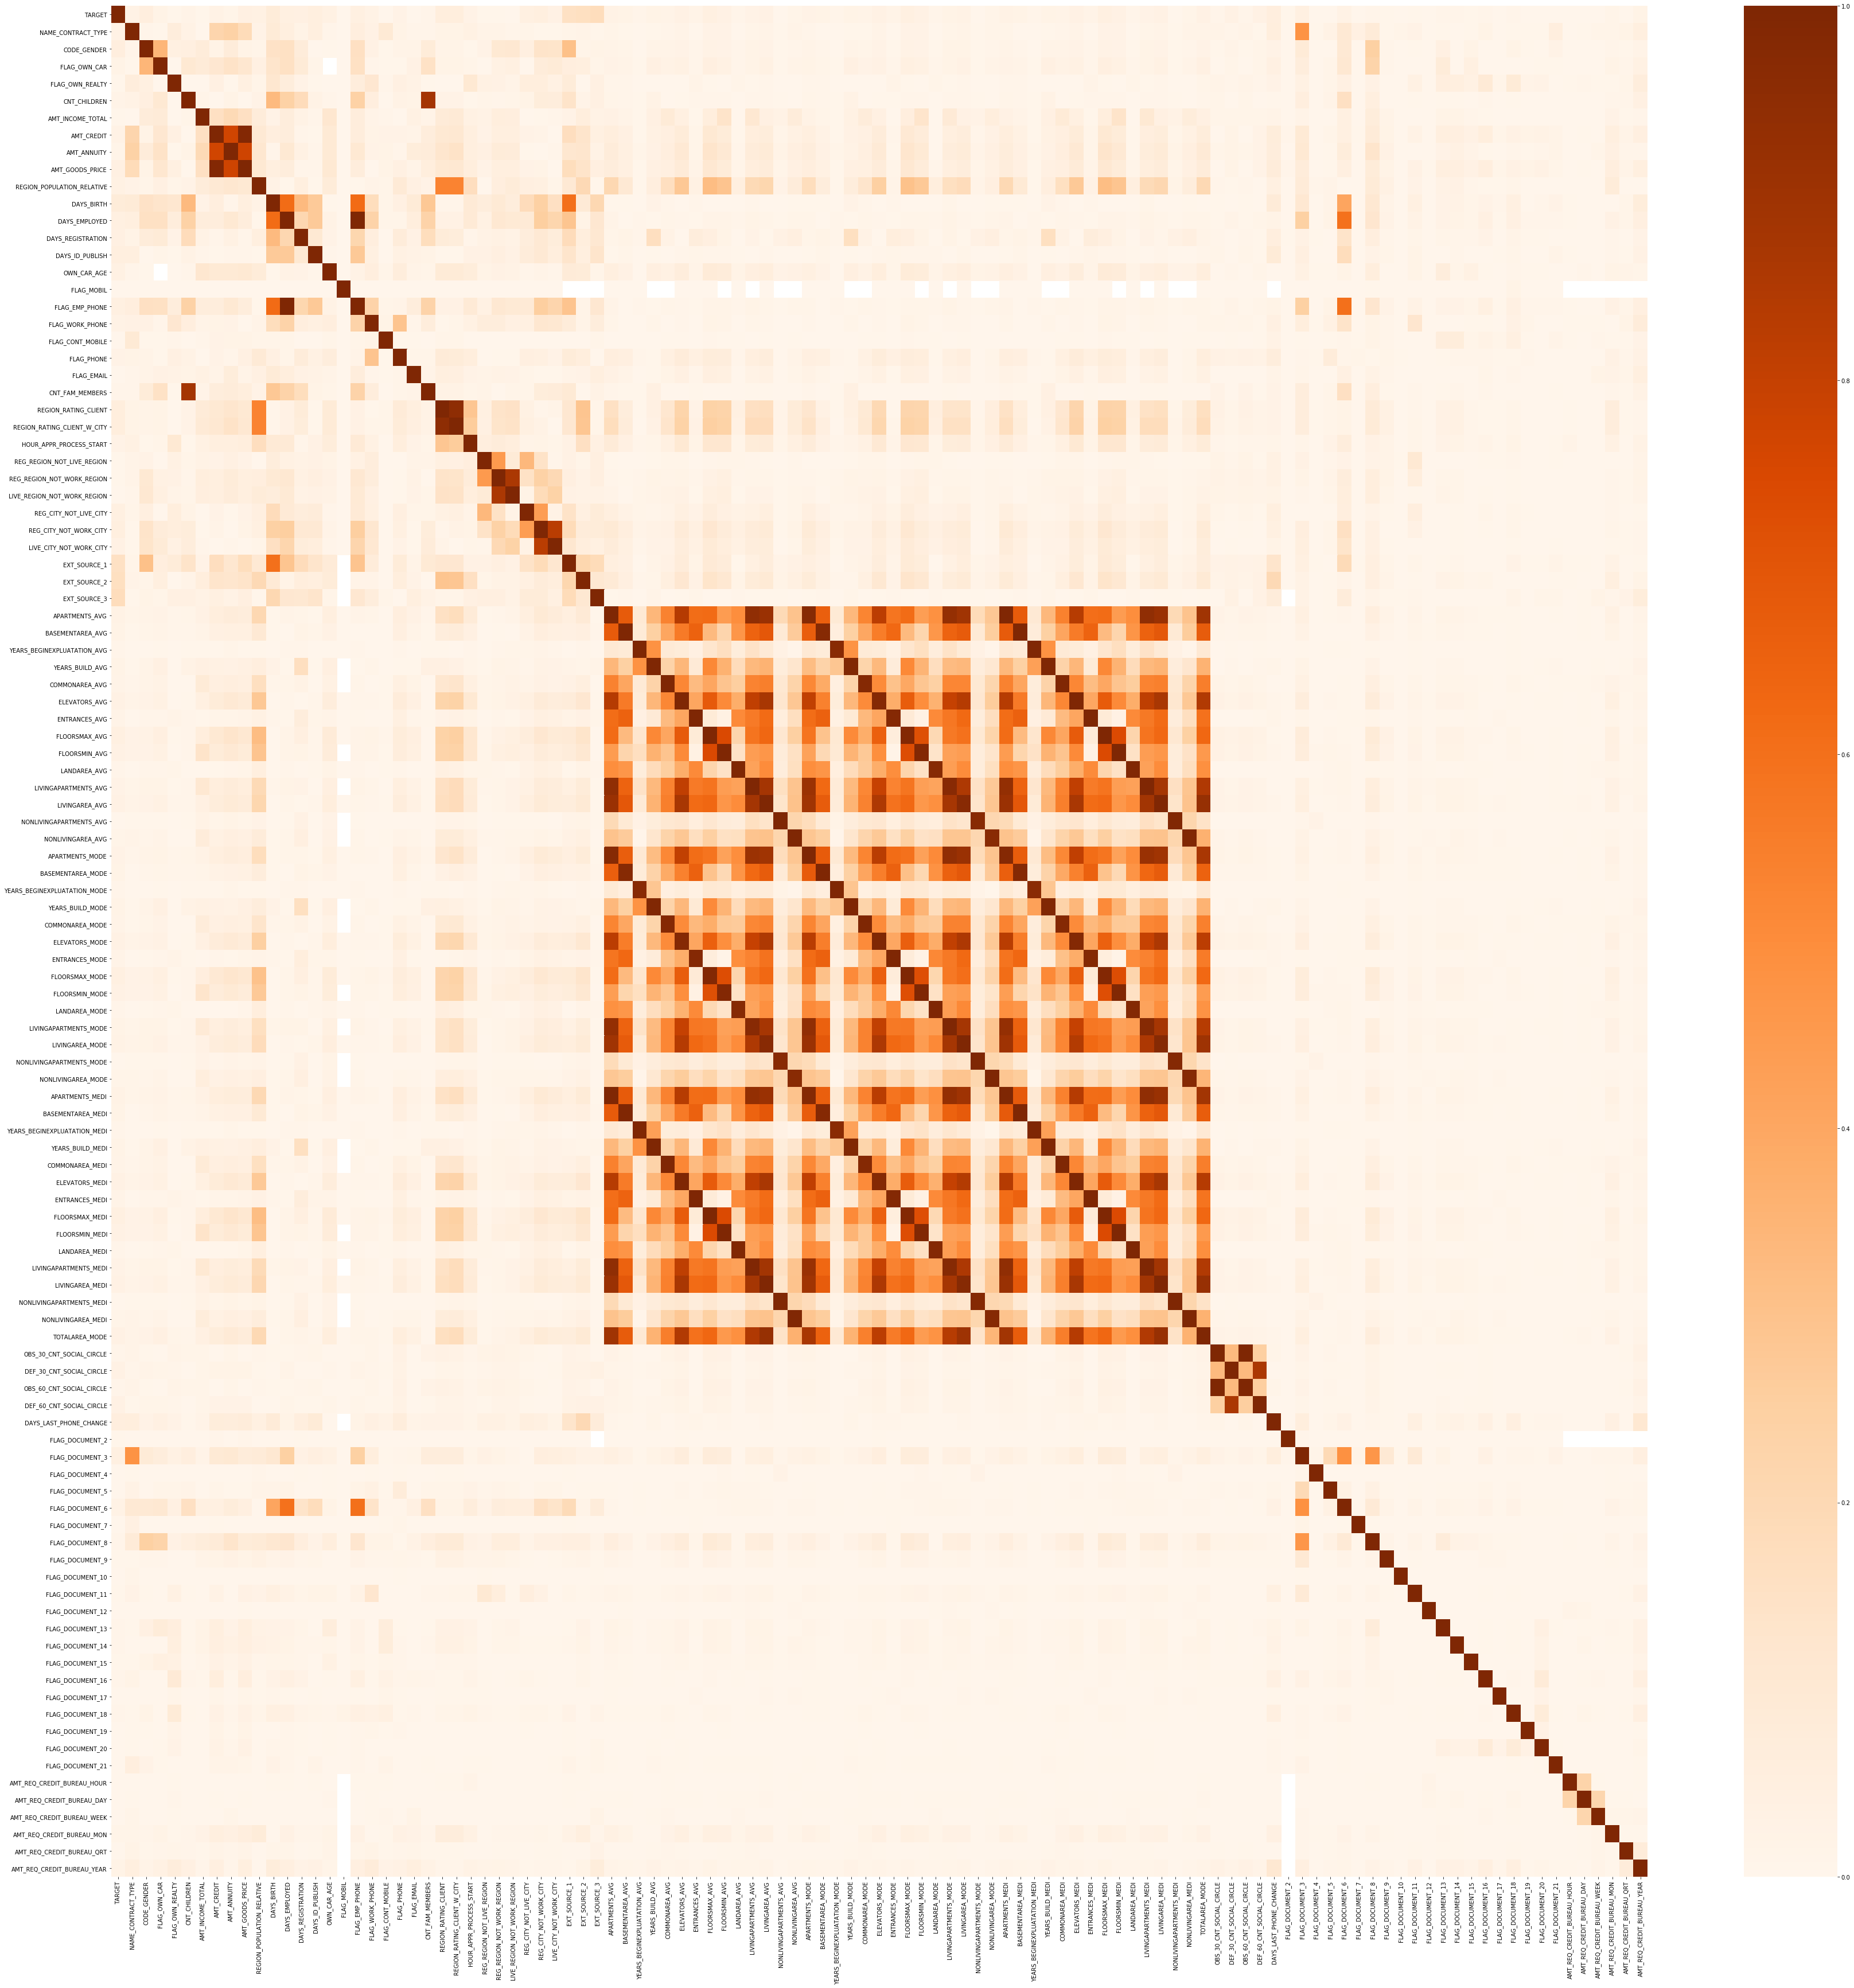

In [157]:
%%time
plot_corr(X, 60)

Метрики дома сильно коррелируют друг с другом, избавимся от них

In [5]:
%%time
#
X.drop("APARTMENTS_AVG", axis=1, inplace=True)
X.drop("BASEMENTAREA_AVG", axis=1, inplace=True)
# X.drop("YEARS_BEGINEXPLUATATION_AVG", axis=1, inplace=True)
X.drop("YEARS_BUILD_AVG", axis=1, inplace=True)
X.drop("COMMONAREA_AVG", axis=1, inplace=True)
X.drop("ELEVATORS_AVG", axis=1, inplace=True)
X.drop("ENTRANCES_AVG", axis=1, inplace=True)
X.drop("FLOORSMAX_AVG", axis=1, inplace=True)
X.drop("FLOORSMIN_AVG", axis=1, inplace=True)
X.drop("LANDAREA_AVG", axis=1, inplace=True)
X.drop("LIVINGAPARTMENTS_AVG", axis=1, inplace=True)
# X.drop("LIVINGAREA_AVG", axis=1, inplace=True)
X.drop("NONLIVINGAPARTMENTS_AVG", axis=1, inplace=True)
X.drop("NONLIVINGAREA_AVG", axis=1, inplace=True)
X.drop("APARTMENTS_MODE", axis=1, inplace=True)
X.drop("BASEMENTAREA_MODE", axis=1, inplace=True)
X.drop("YEARS_BEGINEXPLUATATION_MODE", axis=1, inplace=True)
X.drop("YEARS_BUILD_MODE", axis=1, inplace=True)
X.drop("COMMONAREA_MODE", axis=1, inplace=True)
X.drop("ELEVATORS_MODE", axis=1, inplace=True)
X.drop("ENTRANCES_MODE", axis=1, inplace=True)
X.drop("FLOORSMAX_MODE", axis=1, inplace=True)
X.drop("FLOORSMIN_MODE", axis=1, inplace=True)
X.drop("LANDAREA_MODE", axis=1, inplace=True)
X.drop("LIVINGAPARTMENTS_MODE", axis=1, inplace=True)
X.drop("LIVINGAREA_MODE", axis=1, inplace=True)
X.drop("NONLIVINGAPARTMENTS_MODE", axis=1, inplace=True)
X.drop("NONLIVINGAREA_MODE", axis=1, inplace=True)
X.drop("APARTMENTS_MEDI", axis=1, inplace=True)
X.drop("BASEMENTAREA_MEDI", axis=1, inplace=True)
X.drop("YEARS_BEGINEXPLUATATION_MEDI", axis=1, inplace=True)
X.drop("YEARS_BUILD_MEDI", axis=1, inplace=True)
X.drop("COMMONAREA_MEDI", axis=1, inplace=True)
X.drop("ELEVATORS_MEDI", axis=1, inplace=True)
X.drop("ENTRANCES_MEDI", axis=1, inplace=True)
X.drop("FLOORSMAX_MEDI", axis=1, inplace=True)
X.drop("FLOORSMIN_MEDI", axis=1, inplace=True)
X.drop("LANDAREA_MEDI", axis=1, inplace=True)
X.drop("LIVINGAPARTMENTS_MEDI", axis=1, inplace=True)
X.drop("LIVINGAREA_MEDI", axis=1, inplace=True)
X.drop("NONLIVINGAPARTMENTS_MEDI", axis=1, inplace=True)
X.drop("NONLIVINGAREA_MEDI", axis=1, inplace=True)
X.drop("FONDKAPREMONT_MODE", axis=1, inplace=True)
X.drop("HOUSETYPE_MODE", axis=1, inplace=True)
X.drop("TOTALAREA_MODE", axis=1, inplace=True)
X.drop("WALLSMATERIAL_MODE", axis=1, inplace=True)
X.drop("EMERGENCYSTATE_MODE", axis=1, inplace=True)

Wall time: 8.33 s


Дропнем некоторые хорошо взаимокоррелируемые значения

In [6]:
X.drop("AMT_ANNUITY", axis=1, inplace=True)
X.drop("AMT_GOODS_PRICE", axis=1, inplace=True)
X.drop("DAYS_EMPLOYED", axis=1, inplace=True)
X.drop("REGION_RATING_CLIENT_W_CITY", axis=1, inplace=True)
X.drop("LIVE_CITY_NOT_WORK_CITY", axis=1, inplace=True)
X.drop("LIVE_REGION_NOT_WORK_REGION", axis=1, inplace=True)
X.drop("OBS_60_CNT_SOCIAL_CIRCLE", axis=1, inplace=True)
X.drop("DEF_60_CNT_SOCIAL_CIRCLE", axis=1, inplace=True)

Wall time: 4.43 s


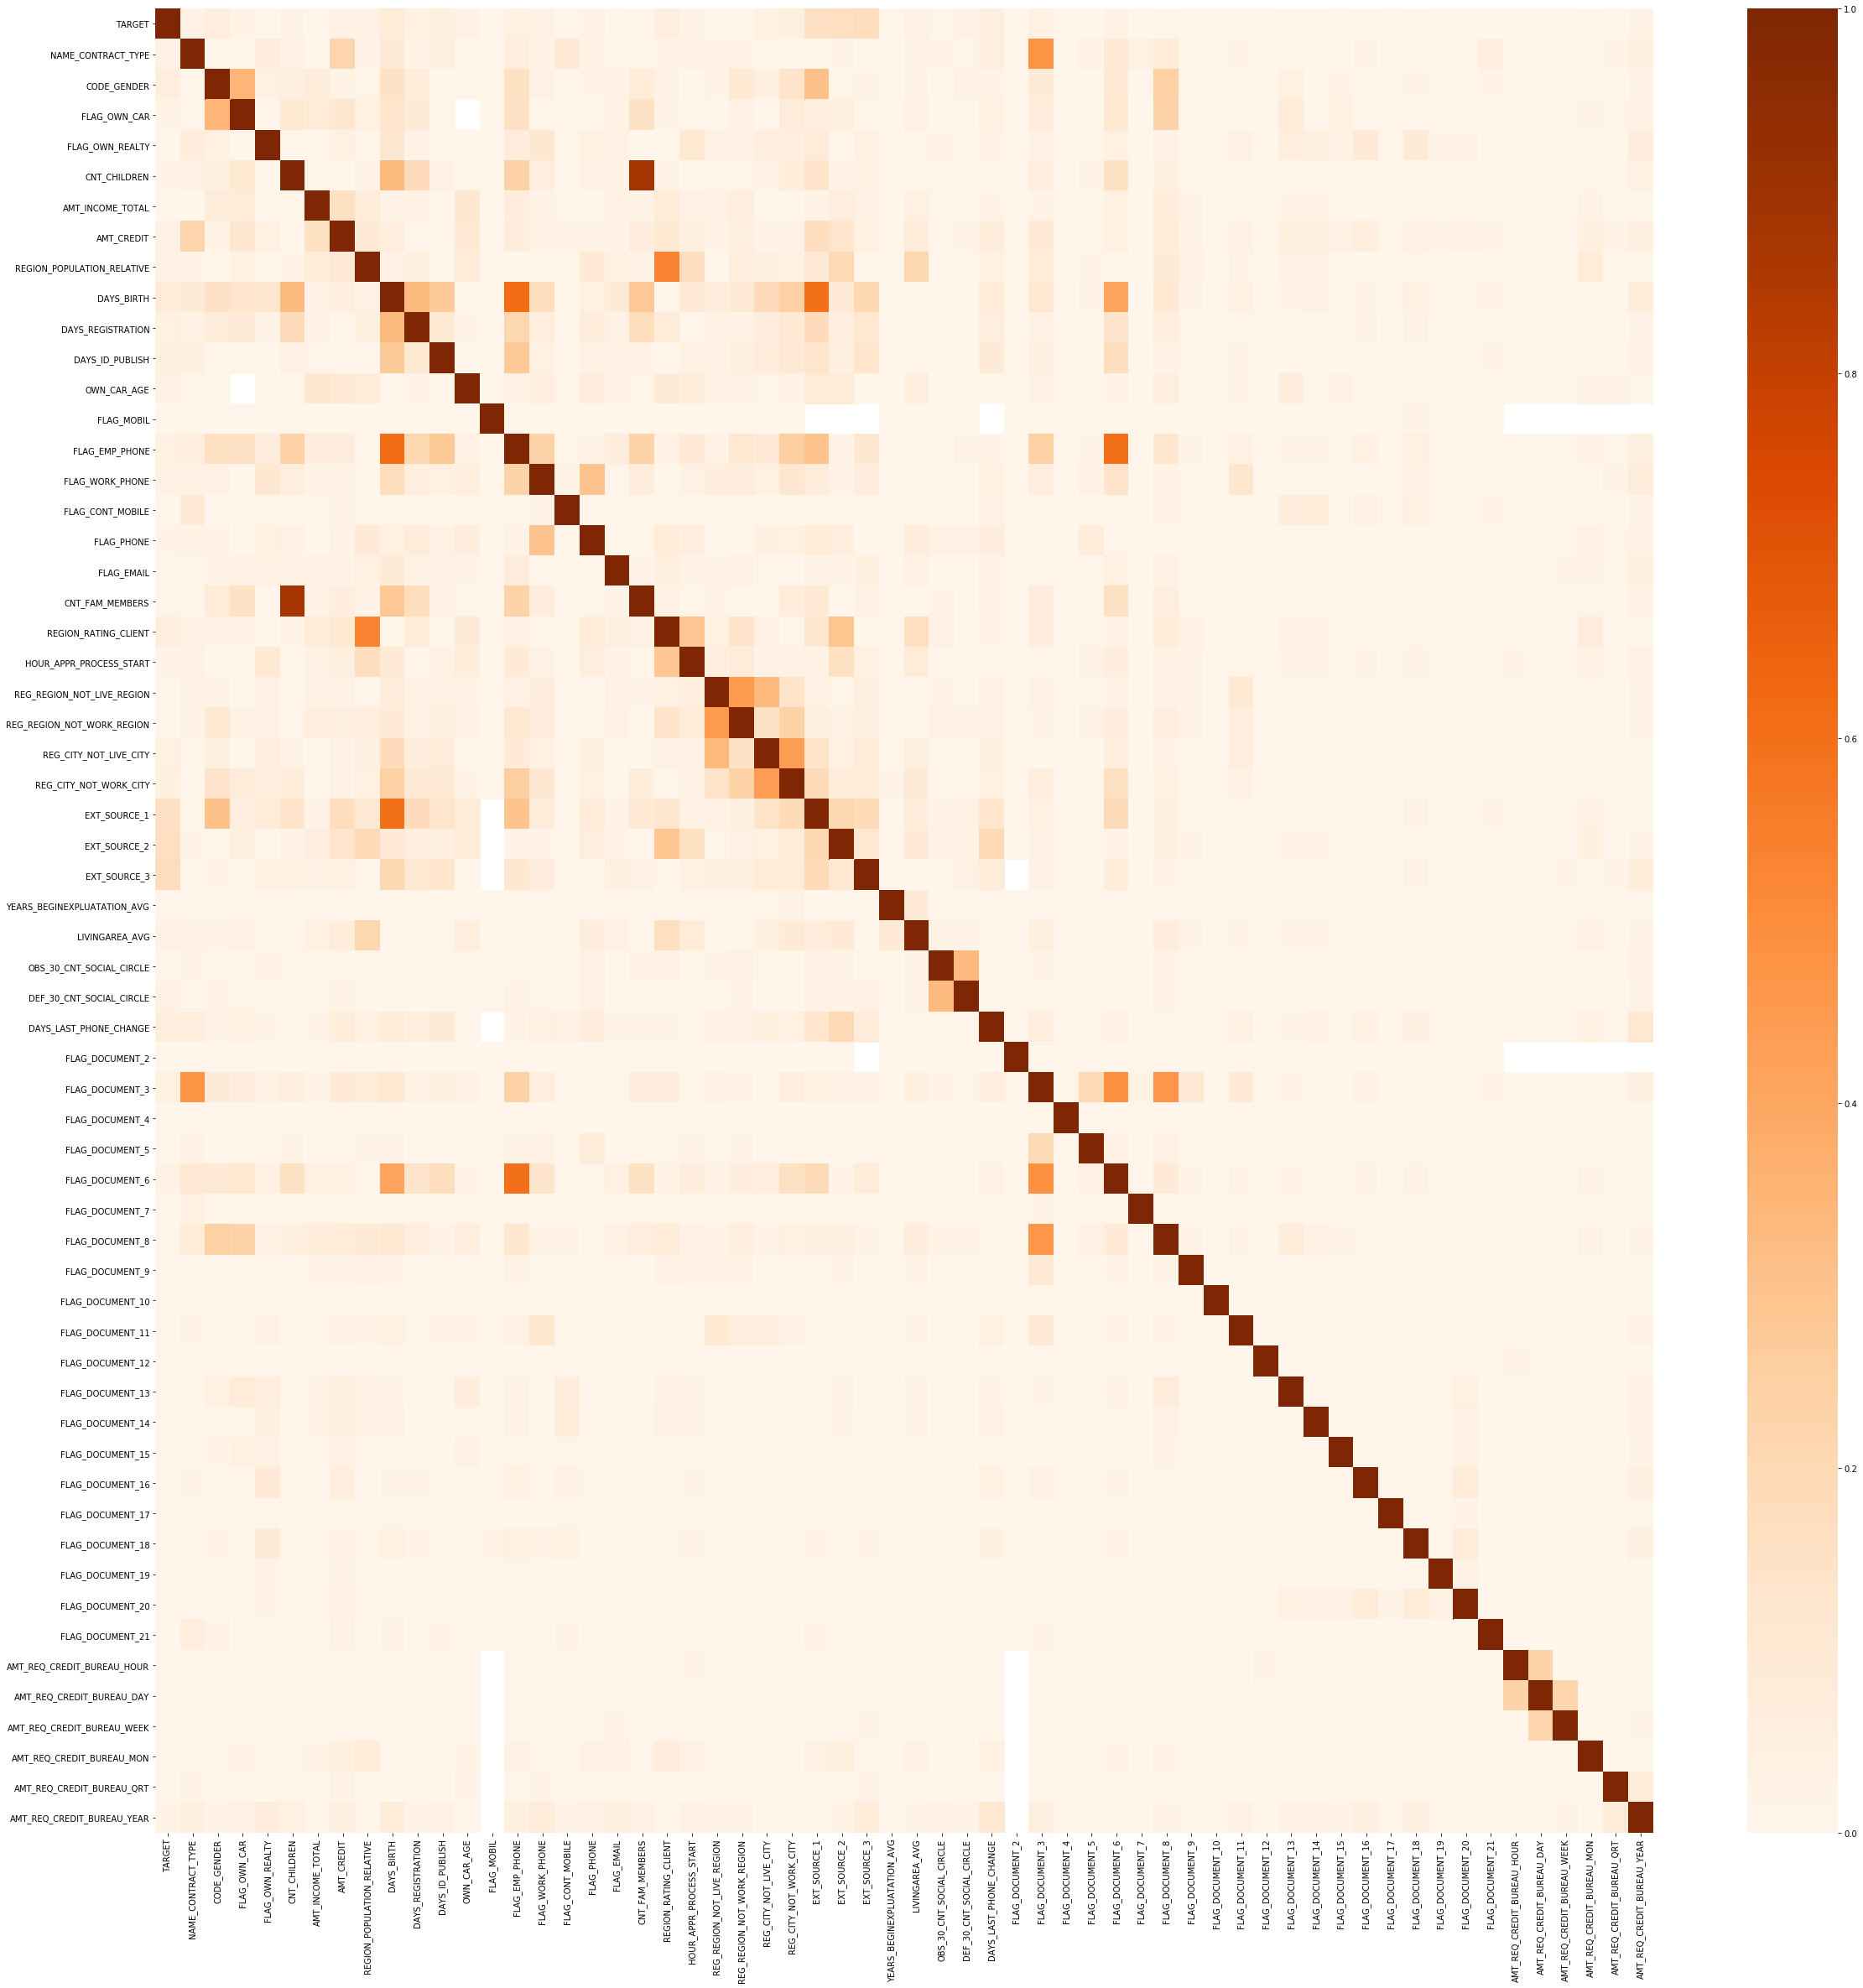

In [163]:
%%time
plot_corr(X, 40)

In [164]:
X.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,1,0,1,0,202500.0,406597.5,Unaccompanied,Working,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,0,0,0,0,0,270000.0,1293502.5,Family,State servant,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,1,1,1,1,0,67500.0,135000.0,Unaccompanied,Working,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,0,0,0,1,0,135000.0,312682.5,Unaccompanied,Working,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,0,1,0,1,0,121500.0,513000.0,Unaccompanied,Working,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
_x_null=X.isnull().sum(axis=0)
_x_null = _x_null[_x_null != 0]
_x_null.shape

(18,)

In [166]:
_x_null[_x_null != 0]

NAME_TYPE_SUITE                  1292
OWN_CAR_AGE                    202929
OCCUPATION_TYPE                 96391
CNT_FAM_MEMBERS                     2
EXT_SOURCE_1                   173378
EXT_SOURCE_2                      660
EXT_SOURCE_3                    60965
YEARS_BEGINEXPLUATATION_AVG    150007
LIVINGAREA_AVG                 154350
OBS_30_CNT_SOCIAL_CIRCLE         1021
DEF_30_CNT_SOCIAL_CIRCLE         1021
DAYS_LAST_PHONE_CHANGE              1
AMT_REQ_CREDIT_BUREAU_HOUR      41519
AMT_REQ_CREDIT_BUREAU_DAY       41519
AMT_REQ_CREDIT_BUREAU_WEEK      41519
AMT_REQ_CREDIT_BUREAU_MON       41519
AMT_REQ_CREDIT_BUREAU_QRT       41519
AMT_REQ_CREDIT_BUREAU_YEAR      41519
dtype: int64

In [7]:
X["OWN_CAR_AGE"].fillna(0, inplace=True)
X["OCCUPATION_TYPE"].fillna('', inplace=True)
X["EXT_SOURCE_1"].fillna(0.5, inplace=True)
X["EXT_SOURCE_2"].fillna(0.5, inplace=True)
X["EXT_SOURCE_3"].fillna(0.5, inplace=True)
X["YEARS_BEGINEXPLUATATION_AVG"].fillna(0.5, inplace=True)
X["LIVINGAREA_AVG"].fillna(0.5, inplace=True)

X["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(0, inplace=True)
X["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(0, inplace=True)
X["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(0, inplace=True)
X["AMT_REQ_CREDIT_BUREAU_MON"].fillna(0, inplace=True)
X["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(0, inplace=True)
X["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(0, inplace=True)
X.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,1,0,1,0,202500.0,406597.5,Unaccompanied,Working,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,0,0,0,0,0,270000.0,1293502.5,Family,State servant,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,1,1,1,1,0,67500.0,135000.0,Unaccompanied,Working,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,0,0,0,1,0,135000.0,312682.5,Unaccompanied,Working,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100007,0,0,1,0,1,0,121500.0,513000.0,Unaccompanied,Working,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [253]:
_x_null=X.isnull().sum(axis=0)
_x_null = _x_null[_x_null != 0]
_x_null.shape

(5,)

In [254]:
_x_null[_x_null != 0]

NAME_TYPE_SUITE             1292
CNT_FAM_MEMBERS                2
OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
DAYS_LAST_PHONE_CHANGE         1
dtype: int64

In [8]:
X.dropna(axis = 0, inplace=True)

In [9]:
X.shape

(305197, 68)

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305197 entries, 100002 to 456255
Data columns (total 68 columns):
TARGET                         305197 non-null int64
NAME_CONTRACT_TYPE             305197 non-null int64
CODE_GENDER                    305197 non-null int64
FLAG_OWN_CAR                   305197 non-null int64
FLAG_OWN_REALTY                305197 non-null int64
CNT_CHILDREN                   305197 non-null int64
AMT_INCOME_TOTAL               305197 non-null float64
AMT_CREDIT                     305197 non-null float64
NAME_TYPE_SUITE                305197 non-null object
NAME_INCOME_TYPE               305197 non-null object
NAME_EDUCATION_TYPE            305197 non-null object
NAME_FAMILY_STATUS             305197 non-null object
NAME_HOUSING_TYPE              305197 non-null object
REGION_POPULATION_RELATIVE     305197 non-null float64
DAYS_BIRTH                     305197 non-null int64
DAYS_REGISTRATION              305197 non-null float64
DAYS_ID_PUBLISH        

In [11]:
X = X.reset_index(drop=True)

In [12]:
y = X["TARGET"]
X = X.drop("TARGET", axis=1)

In [13]:
X.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,1,0,1,0,202500.0,406597.5,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,270000.0,1293502.5,Family,State servant,Higher education,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,1,1,0,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,1,0,135000.0,312682.5,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,1,0,121500.0,513000.0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

__Задание 2. (1.5 балла)__

Обучите реализации градиентного бустинга LightGBM и Catboost на вещественных признаках без подбора параметров. 
Почему получилась заметная разница в качестве? 

В этом и последующих экспериментах необходимо измерять время обучения моделей.

In [16]:
from catboost import CatBoostClassifier 
import lightgbm as lgb
from sklearn.metrics import precision_recall_curve, auc

In [17]:
def pr_auc(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    return auc(recall, precision)

In [581]:
X_train_2 = X_train.select_dtypes(include=["int64", "float64"])
X_test_2 = X_test.select_dtypes(include=["int64", "float64"])

In [571]:
%%time
yandex_clf = CatBoostClassifier(logging_level='Silent')
yandex_clf.fit(X_train_2, y_train)

Wall time: 2min 35s


In [572]:
y_predict_2 = yandex_clf.predict_proba(X_test_2)[:,1]
print("PR-AUC for default yandex boost", pr_auc(y_test, y_predict_2))

PR-AUC for default yandex boost 0.2219287676589921


In [582]:
%%time
l_clf = lgb.LGBMClassifier()
l_clf.fit(X_train_2, y_train)

Wall time: 5.04 s


In [583]:
y_predict_2 = l_clf.predict_proba(X_test_2)[:,1]
print("PR-AUC for default lgb", pr_auc(y_test, y_predict_2))

PR-AUC for default lgb 0.22241316543186374


Алгоритмы catboost и lightgbm имеют разные дефолтные параметры, поэтому отличаются метрики качества и время работы.

__Задание 3. (2 балла)__

Подберите с CV=3 оптимальные параметры алгоритмов, изменяя:

* глубину деревьев;
* количество деревьев;
* темп обучения;
* оптимизируемый функционал.

Проанализируйте соотношения глубины и количества деревьев в зависимости от алгоритма.

In [18]:
from sklearn.model_selection import KFold
from time import time
CV = 3
kf = KFold(n_splits=CV,shuffle=True, random_state=0)

In [25]:
X_3 = X.select_dtypes(include=["int64", "float64"])

In [23]:
def calc_CV_classifier(kf, x, y, classifier):
    _auc = []
    _times = []
    for train_index, test_index in kf.split(x):
        begin = time()
        classifier.fit(x.values[train_index], y[train_index])
        _times.append(time() - begin)
        y_predict = classifier.predict_proba(x.values[test_index])[:,1]
        _auc.append(pr_auc(y[test_index], y_predict))
    d = {}
    d["auc_mean"] = [sum(_auc)/len(_auc)]
    d["time_mean"] = [sum(_times)/len(_times)] 
    for i in range(len(_auc)):
        d["auc_" + str(i + 1)] = [_auc[i]]
    for i in range(len(_times)):   
        d["time_" + str(i + 1)] = [_times[i] ]
    return pd.DataFrame(data=d)

In [519]:
%%time
max_trees = 100
learning_rate = 0.1
result_depth = pd.DataFrame()
for depth in range(1, 10, 2):
    ya_clf = CatBoostClassifier(logging_level='Silent', depth=depth, iterations=max_trees, learning_rate=learning_rate)
    ya_result = calc_CV_classifier(kf, X_3, y, ya_clf)
    ya_result.insert(0, "name", ["ya_depth_" + str(depth)])
    result_depth = result_depth.append(ya_result, ignore_index=True)
  
    l_clf = lgb.LGBMClassifier(max_depth=depth, n_estimators=max_trees, learning_rate=learning_rate)
    l_result = calc_CV_classifier(kf, X_3, y, l_clf)
    l_result.insert(0, "name", ["lgbm_depth_" + str(depth)])
    result_depth = result_depth.append(l_result, ignore_index=True)   

result_depth.set_index('name')

Wall time: 8min 24s


In [520]:
result_depth.sort_values("auc_mean")[::-1]

,name,auc_mean,time_mean,auc_1,auc_2,auc_3,time_1,time_2,time_3
5,lgbm_depth_5,0.230291,5.593335,0.223429,0.239176,0.228270,8.566999,4.053004,4.160001
7,lgbm_depth_7,0.230158,7.535334,0.223212,0.238963,0.228299,7.185001,5.077002,10.343999
9,lgbm_depth_9,0.229801,6.132000,0.222157,0.238988,0.228258,4.259003,3.853998,10.283000
6,ya_depth_7,0.226959,29.459334,0.220238,0.235859,0.224781,28.780998,32.040005,27.556998
3,lgbm_depth_3,0.225972,3.838332,0.219705,0.233778,0.224432,5.414995,3.076999,3.023002
8,ya_depth_9,0.225970,39.175508,0.218561,0.234640,0.224711,33.615525,42.603997,41.307001
4,ya_depth_5,0.225545,23.423001,0.218210,0.233063,0.225363,26.113002,23.535000,20.621000
2,ya_depth_3,0.221001,22.313004,0.214489,0.227418,0.221094,23.228005,25.003004,18.708003
1,lgbm_depth_1,0.209676,2.289332,0.203954,0.214938,0.210136,2.458002,2.238996,2.170998
0,ya_depth_1,0.208214,14.256666,0.202143,0.213642,0.208857,11.011999,11.923000,19.834999


In [19]:
def log_int_iterator(start, end, step):
    i = start
    while i <= end:
        yield int(i)
        i *= step

In [522]:
%%time
depth = 7
learning_rate = 0.1
result_trees = pd.DataFrame()
for max_trees in log_int_iterator(80, 160, 1.3):
    ya_clf = CatBoostClassifier(logging_level='Silent', depth=depth, iterations=max_trees, learning_rate=learning_rate)
    ya_result = calc_CV_classifier(kf, X_3, y, ya_clf)
    ya_result.insert(0, "name", ["ya_trees_" + str(max_trees)])
    result_trees = result_trees.append(ya_result, ignore_index=True)
for max_trees in log_int_iterator(160, 320, 1.3):  
    l_clf = lgb.LGBMClassifier(max_depth=depth, n_estimators=max_trees, learning_rate=learning_rate)
    l_result = calc_CV_classifier(kf, X_3, y, l_clf)
    l_result.insert(0, "name", ["lgbm_trees_" + str(max_trees)])
    result_trees = result_trees.append(l_result, ignore_index=True)   

result_trees.set_index('name')

Wall time: 6min


In [523]:
result_trees.sort_values("auc_mean")[::-1]

,name,auc_mean,time_mean,auc_1,auc_2,auc_3,time_1,time_2,time_3
3,lgbm_trees_160,0.229816,9.093333,0.223193,0.238417,0.227838,8.981001,7.939996,10.359002
4,lgbm_trees_208,0.228892,14.178001,0.222513,0.237266,0.226896,17.672997,7.059005,17.802001
2,ya_trees_135,0.228842,28.218336,0.221562,0.238308,0.226655,28.609002,28.146004,27.900002
5,lgbm_trees_270,0.227802,12.322666,0.221931,0.235679,0.225797,8.879999,19.197000,8.890999
1,ya_trees_104,0.227117,24.395667,0.220216,0.236105,0.225030,25.467998,23.500001,24.219000
0,ya_trees_80,0.225866,21.336667,0.219667,0.234109,0.223822,18.848001,19.586998,25.575003


In [20]:
def log_iterator(start, end, step):
    i = start
    while i <= end:
        yield i
        i *= step

In [26]:
%%time
depth = 7
max_trees = 100
result_rate = pd.DataFrame()
for learning_rate in log_iterator(0.1, 0.2, 1.1):
    ya_clf = CatBoostClassifier(logging_level='Silent', depth=depth, iterations=max_trees, learning_rate=learning_rate)
    ya_result = calc_CV_classifier(kf, X_3, y, ya_clf)
    ya_result.insert(0, "name", ["ya_rate_" + str(learning_rate)])
    result_rate = result_rate.append(ya_result, ignore_index=True)
for learning_rate in log_iterator(0.01, 0.1, 1.2):  
    l_clf = lgb.LGBMClassifier(max_depth=depth, n_estimators=max_trees, learning_rate=learning_rate)
    l_result = calc_CV_classifier(kf, X_3, y, l_clf)
    l_result.insert(0, "name", ["lgbm_rate_" + str(learning_rate)])
    result_rate = result_rate.append(l_result, ignore_index=True)   

result_rate.set_index('name')

Wall time: 11min 1s


In [27]:
result_rate.sort_values("auc_mean")[::-1]

,name,auc_mean,time_mean,auc_1,auc_2,auc_3,time_1,time_2,time_3
19,lgbm_rate_0.07430083706879999,0.230610,6.343334,0.223719,0.238573,0.229538,8.356007,5.977113,4.696882
18,lgbm_rate_0.06191736422399999,0.229380,3.762666,0.222366,0.236994,0.228779,3.863997,3.548001,3.876001
20,lgbm_rate_0.08916100448255998,0.229258,4.138690,0.222003,0.237898,0.227873,5.296533,3.645535,3.474001
4,ya_rate_0.14641000000000004,0.228098,18.970668,0.221503,0.236878,0.225914,16.927000,22.295013,17.689990
17,lgbm_rate_0.05159780351999999,0.227895,4.158113,0.221117,0.235593,0.226975,4.400130,3.935571,4.138638
2,ya_rate_0.12100000000000002,0.227721,18.315660,0.221285,0.234925,0.226953,18.229000,19.092980,17.624999
3,ya_rate_0.13310000000000002,0.227720,16.135347,0.221592,0.235467,0.226100,16.002001,15.514999,16.889040
1,ya_rate_0.11000000000000001,0.227653,17.608335,0.220584,0.236274,0.226101,17.459003,17.710998,17.655004
6,ya_rate_0.17715610000000007,0.227413,15.298333,0.220997,0.234458,0.226783,15.132999,15.297000,15.465001
16,lgbm_rate_0.0429981696,0.227347,3.868698,0.220067,0.234728,0.227248,4.092998,3.639997,3.873099


In [560]:
%%time
depth = 7
max_trees = 100
learning_rate=0.1
result_obj = pd.DataFrame()
for loss_function in ["CrossEntropy", "Logloss", None]:
    ya_clf = CatBoostClassifier(logging_level='Silent', depth=depth, iterations=max_trees, learning_rate=learning_rate, loss_function=loss_function)
    ya_result = calc_CV_classifier(kf, X_3, y, ya_clf)
    ya_result.insert(0, "name", ["ya_loss_function_" + str(loss_function)])
    result_obj = result_obj.append(ya_result, ignore_index=True)


Wall time: 2min 31s


In [561]:
%%time
result_obj_2 = result_obj.copy()

l_clf = lgb.LGBMClassifier(max_depth=depth, n_estimators=max_trees, learning_rate=learning_rate)
l_result = calc_CV_classifier(kf, X_3, y, l_clf)
l_result.insert(0, "name", ["lgbm_objective_None"])
result_obj_2 = result_obj_2.append(l_result, ignore_index=True)   

l_clf = lgb.LGBMClassifier(max_depth=depth, n_estimators=max_trees, learning_rate=learning_rate, is_unbalance=True)
l_result = calc_CV_classifier(kf, X_3, y, l_clf)
l_result.insert(0, "name", ["lgbm_objective_is_unbalance=True"])
result_obj_2 = result_obj_2.append(l_result, ignore_index=True)   

result_obj_2.set_index('name')

Wall time: 32.7 s


In [565]:
%%time
result_obj_3 = result_obj_2.copy()
for metric in ["binary_logloss", "binary_error", "cross_entropy"]:  
    l_clf = lgb.LGBMClassifier(max_depth=depth, n_estimators=max_trees, learning_rate=learning_rate, is_unbalance=True, metric=metric)
    l_result = calc_CV_classifier(kf, X_3, y, l_clf)
    l_result.insert(0, "name", ["lgbm_objective_" + str(metric) + "_is_unbalance=True"])
    result_obj_3 = result_obj_3.append(l_result, ignore_index=True)   

Wall time: 35.3 s


In [566]:
result_obj_3.sort_values("auc_mean")[::-1]

,name,auc_mean,time_mean,auc_1,auc_2,auc_3,time_1,time_2,time_3
7,lgbm_objective_cross_entropy_is_unbalance=True,0.231029,3.276335,0.225010,0.239833,0.228245,3.272002,3.303002,3.254000
6,lgbm_objective_binary_error_is_unbalance=True,0.231029,3.336332,0.225010,0.239833,0.228245,3.349998,3.188997,3.470000
5,lgbm_objective_binary_logloss_is_unbalance=True,0.231029,3.257665,0.225010,0.239833,0.228245,3.384996,3.169000,3.218999
4,lgbm_objective_is_unbalance=True,0.231029,5.420999,0.225010,0.239833,0.228245,6.117998,5.380999,4.764000
3,lgbm_objective_None,0.230158,3.901331,0.223212,0.238963,0.228299,3.951995,3.689000,4.062997
1,ya_loss_function_Logloss,0.226959,17.127992,0.220238,0.235859,0.224781,17.185999,16.607998,17.589980
0,ya_loss_function_CrossEntropy,0.226959,17.556313,0.220238,0.235859,0.224781,16.852995,17.666000,18.149945
2,ya_loss_function_None,0.225346,11.816336,0.218689,0.232687,0.224663,11.424005,11.717007,12.307996


Чем больше количество деревьев и глубина построения, тем дольше работает алгоритм. 
До некоторого числа растет качество моделей, затем оно начинает падать

__Задание 4. (3.5 балла)__

Добавьте категориальные признаки к вещественным следующими способами:

* как OHE признаки;
* как счетчики со сглаживанием.

При подсчете счетчиков запрещается использование циклов. 

На получившихся датасетах подберите параметры у каждого из алгоритмов. Как меняется время, необходимое для обучения модели в зависимости от способа кодирования? Сравните полученные результаты с встроенными методами обработки категориальных признаков. 

In [54]:
def calc_classifier(x_train, y_train, x_test, y_test, classifier):
    begin = time()
    classifier.fit(x_train, y_train)
    _times = time() - begin
    y_predict = classifier.predict_proba(x_test)[:,1]
    _auc = pr_auc(y_test, y_predict)
    d = {}
    d["auc"] = [_auc]
    d["time"] = [_times]
    return pd.DataFrame(data=d)

In [182]:
X_train_OHE = X_train.copy()
X_test_OHE = X_test.copy()
y_train_OHE = y_train.copy()
y_test_OHE = y_test.copy()

In [183]:
%%time
for i in X_train_OHE:
    if X_train_OHE[i].dtype == 'object':
        X_train_OHE = pd.concat([X_train_OHE, pd.get_dummies(X_train_OHE[i], prefix = i)], axis=1)       
        X_test_OHE = pd.concat([X_test_OHE, pd.get_dummies(X_test_OHE[i], prefix = i)], axis=1) 
X_train_OHE.head()

Wall time: 3.21 s


In [184]:
X_train_OHE = X_train_OHE.select_dtypes(include=["int64", "float64", "uint8"])
X_test_OHE = X_test_OHE.select_dtypes(include=["int64", "float64", "uint8"])

In [67]:
%%time
max_trees = 100
learning_rate = 0.1
result_depth_OHE = pd.DataFrame()
for depth in range(5, 10, 2):
    ya_result = calc_classifier(X_train_OHE, y_train_OHE, X_test_OHE, y_test_OHE, CatBoostClassifier(logging_level='Silent', depth=depth, iterations=max_trees, learning_rate=learning_rate))
    ya_result.insert(0, "name", ["ya_depth_" + str(depth)])
    result_depth_OHE = result_depth_OHE.append(ya_result, ignore_index=True)
for depth in range(11, 20, 2):  
    l_result = calc_classifier(X_train_OHE, y_train_OHE, X_test_OHE, y_test_OHE,  lgb.LGBMClassifier(max_depth=depth, n_estimators=max_trees, learning_rate=learning_rate))
    l_result.insert(0, "name", ["lgbm_depth_" + str(depth)])
    result_depth_OHE = result_depth_OHE.append(l_result, ignore_index=True)   

result_depth_OHE.set_index('name')

Wall time: 1min 47s


In [68]:
result_depth_OHE.sort_values("auc")[::-1]

,name,auc,time
6,lgbm_depth_17,0.226655,4.973000
7,lgbm_depth_19,0.226366,5.048001
5,lgbm_depth_15,0.225366,5.063996
4,lgbm_depth_13,0.225254,5.848997
3,lgbm_depth_11,0.224522,5.578999
1,ya_depth_7,0.222873,21.397999
2,ya_depth_9,0.222511,27.170990
0,ya_depth_5,0.221202,21.255000


In [100]:
%%time
learning_rate = 0.1
result_trees_OHE = pd.DataFrame()
for max_trees in log_int_iterator(80, 160, 1.3):
    ya_result = calc_classifier(X_train_OHE, y_train_OHE, X_test_OHE, y_test_OHE,  
                                CatBoostClassifier(logging_level='Silent', depth=7, iterations=max_trees, learning_rate=learning_rate))
    ya_result.insert(0, "name", ["ya_trees_" + str(max_trees)])
    result_trees_OHE = result_trees_OHE.append(ya_result, ignore_index=True)
for max_trees in log_int_iterator(160, 320, 1.3):  
    l_result = calc_classifier(X_train_OHE, y_train_OHE, X_test_OHE, y_test_OHE,  
                               lgb.LGBMClassifier(max_depth=17, n_estimators=max_trees, learning_rate=learning_rate))
    l_result.insert(0, "name", ["lgbm_trees_" + str(max_trees)])
    result_trees_OHE = result_trees_OHE.append(l_result, ignore_index=True)   

result_trees_OHE.set_index('name')

Wall time: 1min 53s


In [101]:
result_trees_OHE.sort_values("auc")[::-1]

,name,auc,time
3,lgbm_trees_160,0.226276,6.691996
4,lgbm_trees_208,0.225808,8.567997
5,lgbm_trees_270,0.225065,10.282003
2,ya_trees_135,0.224759,28.804001
1,ya_trees_104,0.223038,25.267998
0,ya_trees_80,0.221178,22.034606


In [104]:
%%time
result_rate_OHE = pd.DataFrame()
for learning_rate in log_iterator(0.1, 0.2, 1.1):
    ya_result =calc_classifier(X_train_OHE, y_train_OHE, X_test_OHE, y_test_OHE,  
                               CatBoostClassifier(logging_level='Silent', depth=7, iterations=150, learning_rate=learning_rate))
    ya_result.insert(0, "name", ["ya_rate_" + str(learning_rate)])
    result_rate_OHE = result_rate_OHE.append(ya_result, ignore_index=True)
for learning_rate in log_iterator(0.01, 0.1, 1.2):  
    l_result = calc_classifier(X_train_OHE, y_train_OHE, X_test_OHE, y_test_OHE, 
                               lgb.LGBMClassifier(max_depth=17, n_estimators=150, learning_rate=learning_rate))
    l_result.insert(0, "name", ["lgbm_rate_" + str(learning_rate)])
    result_rate_OHE = result_rate_OHE.append(l_result, ignore_index=True)   

result_rate_OHE.set_index('name')

Wall time: 9min 4s


In [105]:
result_rate_OHE.sort_values("auc")[::-1]

,name,auc,time
19,lgbm_rate_0.07430083706879999,0.228120,11.166834
18,lgbm_rate_0.06191736422399999,0.228070,62.689053
17,lgbm_rate_0.05159780351999999,0.226134,20.864165
16,lgbm_rate_0.0429981696,0.225639,18.839656
2,ya_rate_0.12100000000000002,0.225587,31.980033
20,lgbm_rate_0.08916100448255998,0.225213,11.447431
15,lgbm_rate_0.035831808,0.224927,13.206527
0,ya_rate_0.1,0.224669,31.208994
3,ya_rate_0.13310000000000002,0.224383,33.362998
1,ya_rate_0.11000000000000001,0.223548,31.609998


In [186]:
X_train_SC = X_train.copy()
X_test_SC = X_test.copy()
y_train_SC = y_train.copy()
y_test_SC = y_test.copy()

In [187]:
%%time
y_mean = y_train_SC.mean()
for i in X_train_SC:
    if X_train_SC[i].dtype == 'object':
        # Fit
        uniq = pd.DataFrame(data=X_train_SC[i].unique(), columns=["unique"])
        val = uniq.apply(lambda x: 1 if y_train_SC[X_train_SC[X_train_SC[i] == x["unique"]].index].mean() > y_mean else 0, axis=1)
        uniq.insert(loc=1, column='value', value=val)
        uniq = uniq.set_index("unique")
        # Transform
        X_train_SC[i] = X_train_SC.apply(lambda x: uniq.loc[x[i],"value"], axis=1)
        X_test_SC[i] = X_test_SC.apply(lambda x: uniq.loc[x[i],"value"], axis=1)

Wall time: 1min 23s


In [188]:
X_train_SC = X_train_SC.select_dtypes(include=["int64", "float64", "uint8"])
X_test_SC = X_test_SC.select_dtypes(include=["int64", "float64", "uint8"])

In [92]:
%%time
max_trees = 100
learning_rate = 0.1
result_depth_SC = pd.DataFrame()
for depth in range(8, 16, 2):
    ya_result =calc_classifier(X_train_SC, y_train_SC, X_test_SC, y_test_SC,  
                               CatBoostClassifier(logging_level='Silent', depth=depth, iterations=max_trees, learning_rate=learning_rate))
    ya_result.insert(0, "name", ["ya_depth_" + str(depth)])
    result_depth_SC = result_depth_SC.append(ya_result, ignore_index=True)
for depth in range(5, 10, 2):  
    l_result = calc_classifier(X_train_SC, y_train_SC, X_test_SC, y_test_SC,   
                               lgb.LGBMClassifier(max_depth=depth, n_estimators=max_trees, learning_rate=learning_rate))
    l_result.insert(0, "name", ["lgbm_depth_" + str(depth)])
    result_depth_SC = result_depth_SC.append(l_result, ignore_index=True)   

result_depth_SC.set_index('name')

Wall time: 5min 31s


In [93]:
result_depth_SC.sort_values("auc")[::-1]

,name,auc,time
5,lgbm_depth_7,0.226819,4.406003
4,lgbm_depth_5,0.225525,4.298995
6,lgbm_depth_9,0.224344,4.514000
0,ya_depth_8,0.222469,19.968033
1,ya_depth_10,0.221058,34.812993
2,ya_depth_12,0.213479,69.627002
3,ya_depth_14,0.203703,187.957524


In [102]:
%%time
learning_rate = 0.1
result_trees_SC = pd.DataFrame()
for max_trees in log_int_iterator(80, 300, 1.3):
    ya_result = calc_classifier(X_train_SC, y_train_SC, X_test_SC, y_test_SC,  
                                CatBoostClassifier(logging_level='Silent', depth=8, iterations=max_trees, learning_rate=learning_rate))
    ya_result.insert(0, "name", ["ya_trees_" + str(max_trees)])
    result_trees_SC = result_trees_SC.append(ya_result, ignore_index=True)
for max_trees in log_int_iterator(160, 320, 1.3):  
    l_result = calc_classifier(X_train_SC, y_train_SC, X_test_SC, y_test_SC,  
                               lgb.LGBMClassifier(max_depth=7, n_estimators=max_trees, learning_rate=learning_rate))
    l_result.insert(0, "name", ["lgbm_trees_" + str(max_trees)])
    result_trees_SC = result_trees_SC.append(l_result, ignore_index=True)   

result_trees_SC.set_index('name')

Wall time: 3min 53s


In [103]:
result_trees_SC.sort_values("auc")[::-1]

,name,auc,time
6,lgbm_trees_160,0.226953,7.666000
7,lgbm_trees_208,0.226483,10.101635
8,lgbm_trees_270,0.225873,8.554997
5,ya_trees_297,0.223792,58.516913
4,ya_trees_228,0.223316,42.901617
3,ya_trees_175,0.223121,32.979997
2,ya_trees_135,0.223056,25.090998
1,ya_trees_104,0.222755,20.033993
0,ya_trees_80,0.220863,17.984996


In [106]:
%%time
result_rate_SC = pd.DataFrame()
for learning_rate in log_iterator(0.1, 0.2, 1.1):
    ya_result = calc_classifier(X_train_SC, y_train_SC, X_test_SC, y_test_SC,  
                                CatBoostClassifier(logging_level='Silent', depth=8, iterations=300, learning_rate=learning_rate))
    ya_result.insert(0, "name", ["ya_rate_" + str(learning_rate)])
    result_rate_SC = result_rate_SC.append(ya_result, ignore_index=True)
for learning_rate in log_iterator(0.01, 0.1, 1.2):  
    l_result = calc_classifier(X_train_SC, y_train_SC, X_test_SC, y_test_SC,  
                               lgb.LGBMClassifier(max_depth=7, n_estimators=160, learning_rate=learning_rate))
    l_result.insert(0, "name", ["lgbm_rate_" + str(learning_rate)])
    result_rate_SC = result_rate_SC.append(l_result, ignore_index=True)   

result_rate_SC.set_index('name')

Wall time: 11min


In [107]:
result_rate_SC.sort_values("auc")[::-1]

,name,auc,time
18,lgbm_rate_0.06191736422399999,0.228050,9.101934
19,lgbm_rate_0.07430083706879999,0.227807,6.801994
17,lgbm_rate_0.05159780351999999,0.227005,7.220998
16,lgbm_rate_0.0429981696,0.225853,7.941535
20,lgbm_rate_0.08916100448255998,0.225570,6.334002
15,lgbm_rate_0.035831808,0.225211,7.306051
0,ya_rate_0.1,0.223777,59.692731
3,ya_rate_0.13310000000000002,0.223437,65.876862
14,lgbm_rate_0.02985984,0.223329,7.364002
1,ya_rate_0.11000000000000001,0.222403,56.800084


CatBoost categorical

In [118]:
from catboost import Pool, CatBoostClassifier

In [73]:
categorical = np.array(X_train.select_dtypes(include=["object"]).columns)
categorical

array(['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'], dtype=object)

In [119]:
train_dataset = Pool(data=X_train,
                     label=y_train,
                     cat_features=categorical)

eval_dataset = Pool(data=X_test,
                    label=y_test,
                    cat_features=categorical)

In [120]:
model = CatBoostClassifier(iterations=135,
                           learning_rate=0.146,
                           depth=7)

In [121]:
model.fit(train_dataset)

0:	learn: 0.5498153	total: 558ms	remaining: 1m 14s
1:	learn: 0.4577457	total: 932ms	remaining: 1m 1s
2:	learn: 0.3933832	total: 1.43s	remaining: 1m 2s
3:	learn: 0.3515783	total: 1.92s	remaining: 1m 2s
4:	learn: 0.3221710	total: 2.36s	remaining: 1m 1s
5:	learn: 0.3031934	total: 2.81s	remaining: 1m
6:	learn: 0.2900960	total: 3.29s	remaining: 1m
7:	learn: 0.2802120	total: 3.75s	remaining: 59.6s
8:	learn: 0.2739610	total: 4.21s	remaining: 58.9s
9:	learn: 0.2686102	total: 4.66s	remaining: 58.3s
10:	learn: 0.2651570	total: 5.11s	remaining: 57.6s
11:	learn: 0.2620787	total: 5.58s	remaining: 57.2s
12:	learn: 0.2600087	total: 6.22s	remaining: 58.4s
13:	learn: 0.2583669	total: 6.83s	remaining: 59s
14:	learn: 0.2566506	total: 7.33s	remaining: 58.7s
15:	learn: 0.2554154	total: 7.82s	remaining: 58.1s
16:	learn: 0.2546885	total: 8.36s	remaining: 58s
17:	learn: 0.2540173	total: 8.91s	remaining: 57.9s
18:	learn: 0.2531824	total: 9.38s	remaining: 57.3s
19:	learn: 0.2527277	total: 10s	remaining: 57.7s
2

In [146]:
preds_proba = model.predict_proba(eval_dataset)[:,1]
print("Catboost pr auc", pr_auc(y_test, preds_proba))

Catboost pr auc 0.22378657110847214


AUC 0.223777 time 59.692731 для SC

AUC 0.225587 time 31.980033 для OHE

Стандартный метод обработки примерно похож по времени и качеству на SC

In [171]:
X_train_lgbm = X_train.copy()
X_test_lgbm = X_test.copy()

In [172]:
l_cat = "name:" + ','.join(categorical)

In [173]:
for i in categorical:
    X_train_lgbm[i] = X_train_lgbm[i].astype('category')
    X_test_lgbm[i] = X_test_lgbm[i].astype('category')

In [174]:
lgb_train = lgb.Dataset(X_train_lgbm, y_train)

In [201]:
%%time
lgb_params = {
    'objective': 'binary',
    'learning_rate'    : 0.074,
    'max_depth'        : 5,
    'n_estimators'     : 160}

gbm = lgb.train(lgb_params,
                lgb_train,
                num_boost_round=100)

C:\Users\alex1\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Wall time: 5.05 s


In [202]:
print("Lgbm pr auc", pr_auc(y_test,  gbm.predict(X_test_lgbm)))

Lgbm pr auc 0.2251404634039964


AUC 0.228050 time 9.101934  для SC

AUC 0.228120 time 11.166834 для OHE

Ручная обработка дала немного лучшие результаты, однако затрачивала больше времени.
Возможная причина - различные гиперпараметры, подобранные для выборок без категориальных признаках и с их обработкой.

<h1>Conclusion:</h1>

Smoth counter счетчики обрабатываются несколько быстрее чем OHE метод. Возможно это обусловлено разным количеством признаков в выборках после обработки. В то же время, оптимальные гиперпараметры подбираются разные, что говорит о разной природе данных

LightGBM и CatBoost позволяют работать с категориальными признаками, для lgbm необходимо конвертировать тип столбцов и просто передать, далее он сам разберется. Catboost принимает список категориальных столбцов и с ними работает.

__Задание 5. (1 балл)__

Реализуйте блендинг (получение ответов нескольких моделей и взятие их с весами (их нужно подбирать на обучающей выборке)) подобранных в предыдущем задании моделей и сравните качество.

In [194]:
models = {
    "cat_OHE" : {"model":CatBoostClassifier(logging_level='Silent', depth=7, iterations=150, learning_rate=0.12)},
    "lgbm_OHE" : {"model":lgb.LGBMClassifier(max_depth=17, n_estimators=200, learning_rate=0.074)},
    "cat_SC" : {"model":CatBoostClassifier(logging_level='Silent', depth=8, iterations=300, learning_rate=0.1)},
    "lgbm_SC" : {"model":lgb.LGBMClassifier(max_depth=7, n_estimators=160, learning_rate=0.062)},
}

In [277]:
kf = KFold(n_splits=2,shuffle=True, random_state=0)
_y_train = y_train_OHE
_y_train = _y_train.reset_index(drop=True)
for k,v in models.items():
    _x_train = None
    if k.endswith("_OHE"):
        _x_train = X_train_OHE
    else:
        _x_train = X_train_SC
    _x_train = _x_train.reset_index(drop=True)

    for train_index, test_index in kf.split(_x_train):
        begin = time()
        v["model"].fit(_x_train.values[train_index], _y_train[train_index])
        print(k, "fit time: ", time() - begin)
        v["proba"] = v["model"].predict_proba(_x_train.values[test_index])[:,1]
        v["auc"] = pr_auc(_y_train[test_index], v["proba"])
        break

cat_OHE fit time:  20.19306516647339
lgbm_OHE fit time:  4.79600191116333
cat_SC fit time:  44.660996437072754
lgbm_SC fit time:  4.1190056800842285


In [278]:
from sklearn.linear_model import LinearRegression

In [279]:
d_blend = pd.DataFrame()
for k,v in models.items():
    d_blend[k] = pd.Series(v['proba'])
d_blend.head()

,cat_OHE,lgbm_OHE,cat_SC,lgbm_SC
0,0.068491,0.048327,0.057223,0.055038
1,0.018775,0.026063,0.016626,0.028834
2,0.041735,0.042472,0.042970,0.034474
3,0.024000,0.027915,0.016231,0.026459
4,0.039678,0.040463,0.030689,0.070291


In [280]:
lr_blend = LinearRegression()
lr_blend.fit(d_blend, _y_train[test_index])
lr_blend.coef_

array([0.2876268 , 0.12899986, 0.3083336 , 0.26534119])

In [281]:
out = pd.DataFrame()
for k,v in models.items(): 
    _x_test = None
    if k.endswith("_OHE"):
        _x_test = X_test_OHE
    else:
        _x_test = X_test_SC
    out[k] = v["model"].predict_proba(_x_test)[:,1]
out.head()

,cat_OHE,lgbm_OHE,cat_SC,lgbm_SC
0,0.168339,0.229026,0.146101,0.199716
1,0.158058,0.167274,0.285554,0.146087
2,0.056792,0.051607,0.074889,0.047308
3,0.152083,0.163874,0.198038,0.183191
4,0.080180,0.077358,0.059342,0.053366


In [286]:
result_predict = np.sum(out.values * 0.5, axis=1)
result_predict

array([0.37159091, 0.37848636, 0.1152988 , ..., 0.06779153, 0.05902516,
       0.10185661])

In [287]:
_auc = pr_auc(y_test_OHE,result_predict)
_auc

0.22509396174519794

In [288]:
result_blend = pd.DataFrame()
for k,v in models.items(): 
    result_blend = result_blend.append(pd.DataFrame(data={"name":[k], "auc":v["auc"]}), ignore_index=True)
result_blend = result_blend.append(pd.DataFrame(data={"name":["blend"], "auc":[_auc]}), ignore_index=True)


In [285]:
result_blend.sort_values("auc")[::-1]

,name,auc
3,lgbm_SC,0.230242
2,cat_SC,0.230041
0,cat_OHE,0.228619
1,lgbm_OHE,0.227083
4,blend,0.224872


Блендинг не повысил качество 

__Задание 6. (1.5 балла)__

В задании 3 вы подобрали гиперпараметры для LightGBM и CatBoost на вещественных признаках. Визуализируйте важности признаков, посчитанные этими алгоритмами, в виде горизонтального bar-plot (отсортируйте признаки по убыванию важности, подпишите названия признаков по оси y).

Для каждого из двух алгоритмов удалите неважные признаки (обычно по bar-plot хорошо видно порог на важность, с которого начинается хвост неважных признаков) и обучите ту же модель на получившихся данных. Сильно ли упало качество при удалении признаков, которые модель считает неважными?

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
_x_train = X_train.select_dtypes(include=["int64", "float64"])
_x_test = X_test.select_dtypes(include=["int64", "float64"])

In [49]:
%%time
clf = lgb.LGBMClassifier(max_depth=5, n_estimators=160, learning_rate=0.074)
clf.fit(_x_train, y_train)
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,_x_train.columns)), columns=['Value','Feature'])
print("pr-auc", pr_auc(y_test, clf.predict_proba(_x_test)[:,1]))

pr-auc 0.22302033721552292
Wall time: 6.4 s


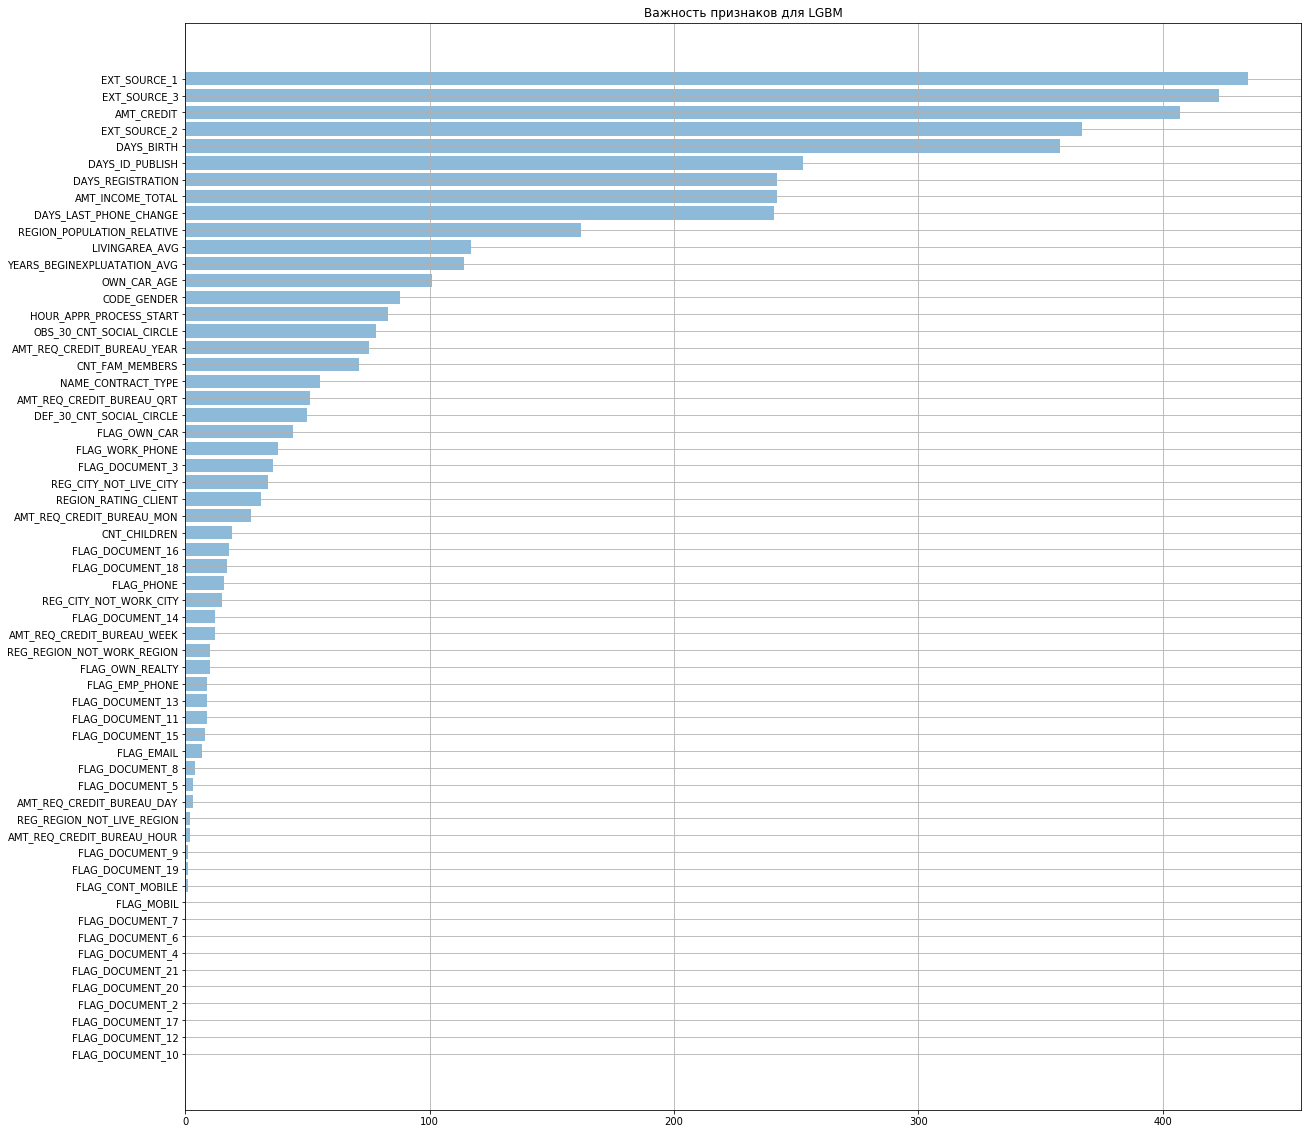

In [38]:
objects = feature_imp['Feature']
y_pos = np.arange(len(objects))
performance = feature_imp['Value']
plt.figure(figsize=(20,20))
plt.grid(True)
plt.title('Важность признаков для LGBM')
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.show()

In [53]:
select = feature_imp.sort_values("Value")[::-1]["Feature"][:41].values
_x_train_lgb = _x_train[select]
_x_test_lgb = _x_test[select]

In [54]:
%%time
clf = lgb.LGBMClassifier(max_depth=5, n_estimators=160, learning_rate=0.074)
clf.fit(_x_train_lgb, y_train)
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,_x_train_lgb.columns)), columns=['Value','Feature'])
print("pr-auc", pr_auc(y_test, clf.predict_proba(_x_test_lgb)[:,1]))

pr-auc 0.22301141951869569
Wall time: 5.15 s


In [51]:
%%time
clf = CatBoostClassifier(max_depth=7, n_estimators=135, learning_rate=0.146)
clf.fit(_x_train, y_train)
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,_x_train.columns)), columns=['Value','Feature'])
print("pr-auc", pr_auc(y_test, clf.predict_proba(_x_test)[:,1]))

0:	learn: 0.5466391	total: 164ms	remaining: 22s
1:	learn: 0.4562286	total: 321ms	remaining: 21.3s
2:	learn: 0.3935334	total: 481ms	remaining: 21.2s
3:	learn: 0.3543266	total: 638ms	remaining: 20.9s
4:	learn: 0.3248818	total: 790ms	remaining: 20.5s
5:	learn: 0.3053074	total: 945ms	remaining: 20.3s
6:	learn: 0.2903538	total: 1.14s	remaining: 20.8s
7:	learn: 0.2813296	total: 1.31s	remaining: 20.7s
8:	learn: 0.2747577	total: 1.47s	remaining: 20.6s
9:	learn: 0.2693616	total: 1.63s	remaining: 20.4s
10:	learn: 0.2647987	total: 1.84s	remaining: 20.7s
11:	learn: 0.2621068	total: 2.05s	remaining: 21s
12:	learn: 0.2598813	total: 2.29s	remaining: 21.4s
13:	learn: 0.2583308	total: 2.51s	remaining: 21.7s
14:	learn: 0.2571862	total: 2.7s	remaining: 21.6s
15:	learn: 0.2559531	total: 2.88s	remaining: 21.4s
16:	learn: 0.2550236	total: 3.12s	remaining: 21.7s
17:	learn: 0.2543727	total: 3.31s	remaining: 21.5s
18:	learn: 0.2536770	total: 3.49s	remaining: 21.3s
19:	learn: 0.2532385	total: 3.65s	remaining: 2

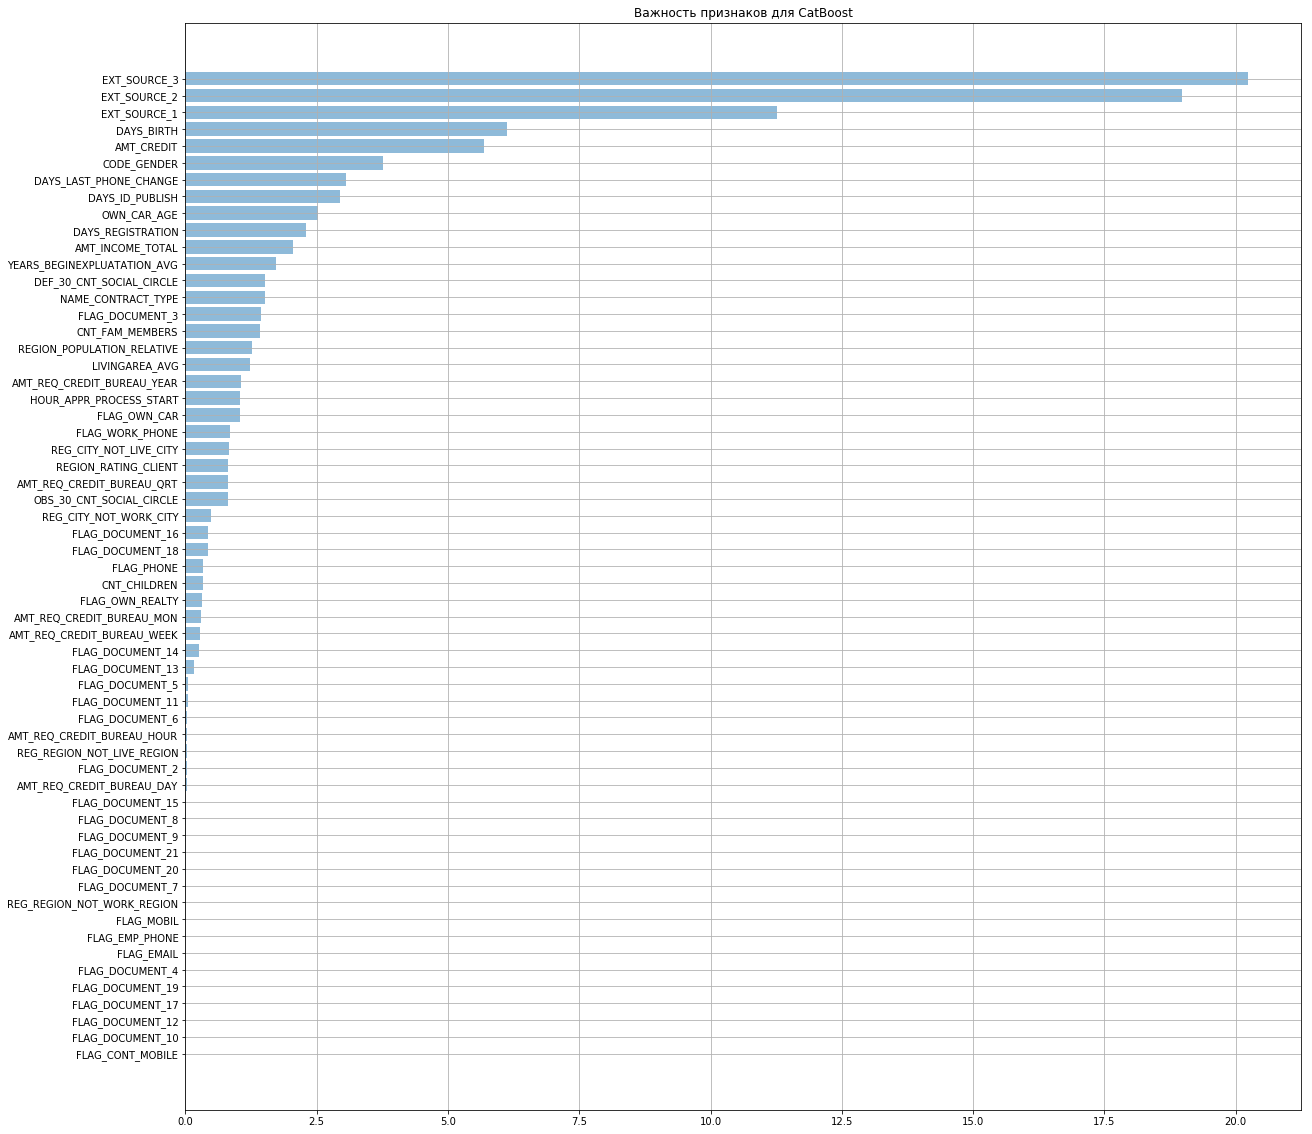

In [52]:
objects = feature_imp['Feature']
y_pos = np.arange(len(objects))
performance = feature_imp['Value']
plt.figure(figsize=(20,20))
plt.grid(True)
plt.title('Важность признаков для CatBoost')
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.show()

In [55]:
select = feature_imp.sort_values("Value")[::-1]["Feature"][:30].values
_x_train_lgb = _x_train[select]
_x_test_lgb = _x_test[select]

In [56]:
%%time
clf = lgb.LGBMClassifier(max_depth=5, n_estimators=160, learning_rate=0.074)
clf.fit(_x_train_lgb, y_train)
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,_x_train_lgb.columns)), columns=['Value','Feature'])
print("pr-auc", pr_auc(y_test, clf.predict_proba(_x_test_lgb)[:,1]))

pr-auc 0.22260249357719117
Wall time: 4.55 s


После селеции качество lgbm практически не изменилось, качество же catboost'a даже несколько повысилось
